# PCA With MNIST

In [1]:
import numpy as np
import mnist
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
import collections

# Load the Data

In [2]:
 #training data 
train_images = mnist.train_images()
train_labels = mnist.train_labels()

#test data
test_images = mnist.test_images()
test_labels = mnist.test_labels()

#print the shape 
mnist_train = train_images.flatten().reshape(60000,784)
mnist_test = test_images.flatten().reshape(10000,784)


Y_train = mnist.train_labels()
Y_test = mnist.test_labels()

## PCA

In [4]:
#set random seed
np.random.seed(42)

#finding the mean of predictors 
mean_train = np.mean(mnist_train,axis = 0)

#subtracting the mean of each predictor from the input data 
mnist_mean_train = mnist_train - mean_train

mnist_mean_test = mnist_test - mean_train


#finding the covariance matrix
cov = np.cov(mnist_mean_train.T)

#computing eigen vectcors and eigen values from the covariance matrix
eigen_value,eigen_vector = np.linalg.eig(cov)



#make a tuple of eigen pairs
eigen_pair = [(eigen_value[i], eigen_vector[:,i]) for i in range(len(eigen_value))]


#sort the list in decreasing order of eigen values
eigen_pair.sort(key = lambda x: x[0], reverse = True)


## Selecting top Components from PCA

C:\Users\Shantam Gupta\Anaconda3\lib\site-packages\matplotlib\patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)


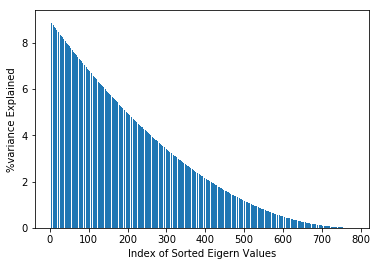

In [5]:
#How many PCA do we need 

total = sum(eigen_value)
var_exp = [i*100/total  for i in range(len(sorted(eigen_value, reverse = True)))]
cum_var_exp = np.cumsum(var_exp)[::-1] # reverse the array

plt.bar(np.arange(0,len(eigen_value),1), cum_var_exp)
plt.xlabel("Index of Sorted Eigern Values")
plt.ylabel("%variance Explained")
plt.show()


In [6]:
W = eigen_pair[0][1].reshape(784,1)
#take first 5, 20 eigen vectors
for i in range(1,5):
    W = np.hstack((W,eigen_pair[i][1].reshape(784,1)))
    
#transforming original X into new 60,000 * 5 features
pca_5_train =  mnist_mean_train.dot(W)
pca_5_test =   mnist_mean_test.dot(W)


## Building Models with reduced dimensions

In [7]:
##################################################################
#Logistic Regression model
log_model = LogisticRegression(penalty="l2",C = 1)
log_model.fit(pca_5_train,Y_train)

#accuracy on train data
print(log_model.score(pca_5_train,Y_train))
#.6435


#Accuracy on test data
print(log_model.score(pca_5_test,Y_test))
#.6525

C:\Users\Shantam Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.64345
0.6525


In [8]:
###################################################
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(pca_5_train,Y_train)

#accuracy on train data
print(clf.score(pca_5_train,Y_train))
#1

#Accuracy on test data
print(clf.score(pca_5_test,Y_test))
#.6712

C:\Users\Shantam Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


1.0
0.6712
